In [8]:
import numpy as np
from scipy.signal import convolve2d
# to read an image from a url
from imageio import imread
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [30]:
imgN = 20
image = np.random.randn(imgN,imgN)
# convolution kernel
kernelN = 7
Y,X = np.meshgrid(np.linspace(-3,3,kernelN),np.linspace(-3,3,kernelN))
kernel = np.exp( -(X**2+Y**2)/7 )

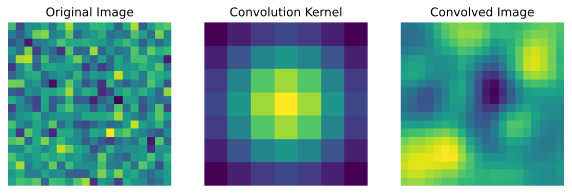

In [32]:
# convolution
convolved_image = convolve2d(image, kernel, mode='same')

# original image, kernel, and convolved image plots
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
# original image
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')
# convolution kernel
axes[1].imshow(kernel)
axes[1].set_title('Convolution Kernel')
axes[1].axis('off')
# convolved image
axes[2].imshow(convolved_image)
axes[2].set_title('Convolved Image')
axes[2].axis('off')

plt.show()

In [10]:
import matplotlib.image as mpimg

In [12]:
cellimg = mpimg.imread('C2-SHRTA.jpg')

(1024, 1024, 3)


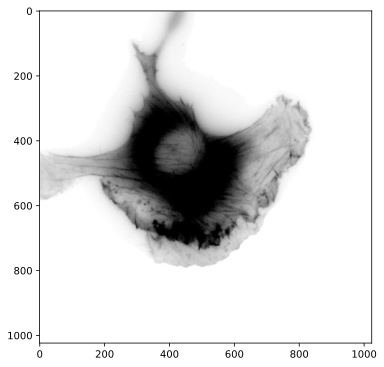

In [14]:
print(cellimg.shape)
fig = plt.figure(figsize=(10,6))
plt.imshow(cellimg);

In [45]:
#2d transform
cellimg = np.mean(cellimg,axis=2)
cellimg2 = cellimg/np.max(cellimg)
print(cellimg2.shape)

(1024, 1024)


In [76]:
#edge detection kernels
# vertical kernel
VK = np.array([ [1,0,-1],
                [1,0,-1],
                [1,0,-1] ])
# horizontal kernel
HK = np.array([ [ 1, 1, 1],
                [ 0, 0, 0],
                [-1,-1,-1] ])
SobelVK = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])

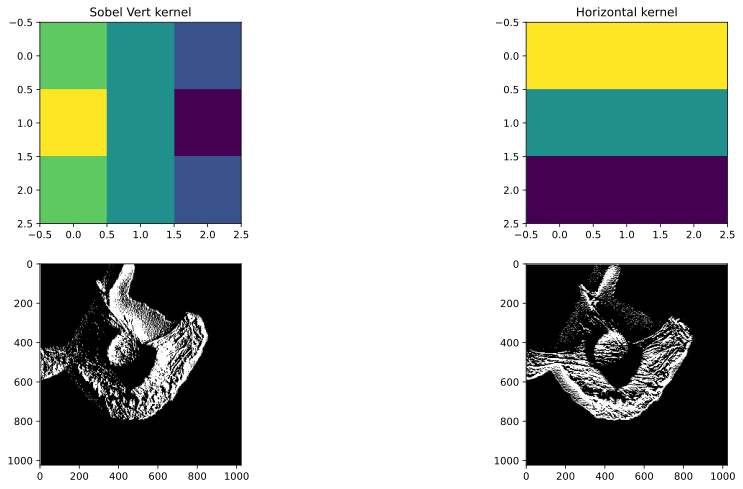

In [82]:
fig,ax = plt.subplots(2,2,figsize=(16,8))

ax[0,0].imshow(SobelVK)
ax[0,0].set_title('Sobel Vert kernel')
ax[0,1].imshow(HK)
ax[0,1].set_title('Horizontal kernel')

# run convolution 
convres = convolve2d(cellimg2,SobelVK,mode='same')
ax[1,0].imshow(convres,cmap='gray',vmin=0,vmax=.01)
convres = convolve2d(cellimg2,HK,mode='same')
ax[1,1].imshow(convres,cmap='gray',vmin=0,vmax=.01)
plt.show()

In [110]:
#edge detection
PrewittHK = np.array([
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
])
#edge detection, computes 2nd derivative 
LaplacianK = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
])
#smooth/blur
GaussianBlurK = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
]) / 16
#emphasize difference in pixel intensity
EmbossK = np.array([
    [-2, -1, 0],
    [-1, 1, 1],
    [0, 1, 2]
])


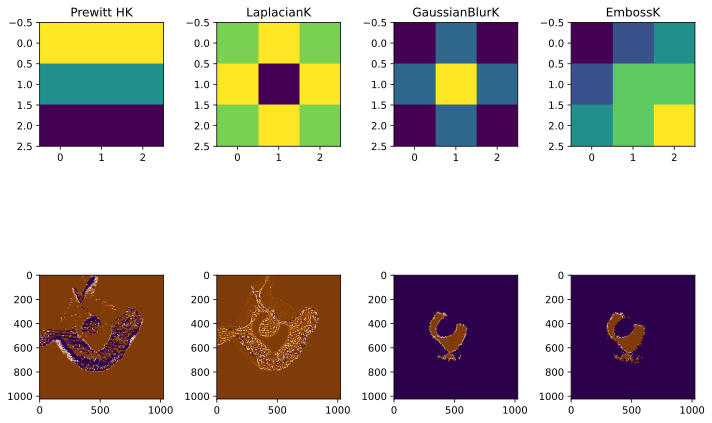

In [112]:
fig,ax = plt.subplots(2,4,figsize=(10,8))
ax[0,0].imshow(PrewittHK)
ax[0,0].set_title('Prewitt HK')
ax[0,1].imshow(LaplacianK)
ax[0,1].set_title('LaplacianK')
ax[0,2].imshow(GaussianBlurK)
ax[0,2].set_title('GaussianBlurK')
ax[0,3].imshow(EmbossK)
ax[0,3].set_title('EmbossK')
# run convolution 
convres = convolve2d(cellimg2,PrewittHK,mode='same')
ax[1,0].imshow(convres,cmap='PuOr',vmin=0,vmax=.01)
convres = convolve2d(cellimg2,LaplacianK,mode='same')
ax[1,1].imshow(convres,cmap='PuOr',vmin=0,vmax=.01)
convres = convolve2d(cellimg2,GaussianBlurK,mode='same')
ax[1,2].imshow(convres,cmap='PuOr',vmin=0,vmax=.01)
convres = convolve2d(cellimg2,EmbossK,mode='same')
ax[1,3].imshow(convres,cmap='PuOr',vmin=0,vmax=.01)
plt.tight_layout()
plt.show()

In [47]:
import torch
import torch.nn as nn

In [37]:
#convolve image of size 1x256x256 to produce a 1x252x84 result
# parameters
inChans  = 1 # 1 grayscale 3 rgb
imsize   = [256,256] #height, width
outChans = 1
krnSize  = 7 # if odd makes easier 
stride   = (1,3) #vertical by horizontal
padding  = 1  #by pixel 

# instance
c = nn.Conv2d(inChans,outChans,krnSize,stride,padding)  #just like nn.linear setup

img = torch.rand(1,inChans,imsize[0],imsize[1])  #image input
resimg = c(img)  #performs convolution
empSize = torch.squeeze(resimg).shape  #compute shape 

# compute the size of the result 
expectSize = np.array([outChans,0,0],dtype=int) #initialize array
expectSize[1] = np.floor( (imsize[0]+2*padding-krnSize)/stride[0] ) + 1 #height
expectSize[2] = np.floor( (imsize[1]+2*padding-krnSize)/stride[1] ) + 1  #width
# check the size of the output
print(f'Expected size: {expectSize}')
print(f'Empirical size: {list(empSize)}')

Expected size: [  1 252  84]
Empirical size: [252, 84]


In [39]:
# 3x196x96 convolve to produce a 5x66x49 result for MATLAB
# parameters 
inChans  = 3
imsize   = [196,96]
outChans = 5
krnSize  = 5
stride   = (3,2)
padding  = 3

# instance
c = nn.Conv2d(inChans,outChans,krnSize,stride,padding)  #just like nn.linear setup

img = torch.rand(1,inChans,imsize[0],imsize[1])  #image input
resimg = c(img)  #performs convolution
empSize = torch.squeeze(resimg).shape  #compute shape 

# compute the size of the result 
expectSize = np.array([outChans,0,0],dtype=int) #initialize array
expectSize[1] = np.floor( (imsize[0]+2*padding-krnSize)/stride[0] ) + 1 #height
expectSize[2] = np.floor( (imsize[1]+2*padding-krnSize)/stride[1] ) + 1  #width
# check the size of the output
print(f'Expected size: {expectSize}')
print(f'Empirical size: {list(empSize)}')

Expected size: [ 5 66 49]
Empirical size: [5, 66, 49]


In [108]:
# convert to tensor
import torch
import torch.nn.functional as F
#cellimg2_T = torch.tensor(cellimg2).view(1,1,cellimg2.shape[0],cellimg2.shape[1])
#print(cellimg2_T.shape)
cellimg2_T = torch.tensor(cellimg2, dtype=torch.float32).view(1, 1, cellimg2.shape[0], cellimg2.shape[1])
print(cellimg2_T.shape)

torch.Size([1, 1, 1024, 1024])


In [110]:
# parameters for max pooling, reduce spatial size with each network layer 
#allows CNN to see more of the image and detect one feature anywhere in the image 
poolSize = 3
stride   = 3
# create the instance
p2 = nn.MaxPool2d(poolSize,stride=stride)
print(p2)

MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)


In [112]:
img2 = cellimg2_T
# all combinations of image and maxpool dimensionality
img2Pool2 = p2(img2)
print(f'2D image, 2D maxpool: {img2Pool2.shape}\n' )

2D image, 2D maxpool: torch.Size([1, 1, 341, 341])



In [25]:
#image transforms 
import torchvision
import torchvision.transforms as T
from PIL import Image

In [27]:
cellimg = Image.open('C2-SHRTA.jpg')

In [35]:
Ts = T.Compose([ T.ToTensor(),
                 T.Resize(32*4,antialias=True),
                 T.Grayscale(num_output_channels=1)  ])

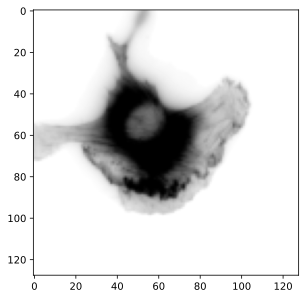

In [37]:
transformed_img = Ts(cellimg)
# Plot the transformed image
plt.imshow(transformed_img.squeeze(), cmap='gray')
plt.show()